In [36]:
# import pandas, numpy
import numpy as np
import pandas as pd

# Create the required data frames by reading in the files
df_s = pd.read_excel('SaleData.xlsx')
df_i = pd.read_csv('imdb.csv',escapechar = "\\")
df_d = pd.read_csv('diamonds.csv')
df_m = pd.read_csv('movie_metadata.csv',escapechar = "\\")

import seaborn as sns
sn.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings #suppress certain warnings from libraries
warnings.filterwarnings("ignore")

In [37]:
#Correlation between Title length and imdb Rating
def corr(df):
    df['Title_length'] = df['wordsInTitle'].str.len()
    df['Quantile']=pd.qcut(df['Title_length'], q=4, labels=False)
    corr_value=df['Title_length'].corr(df['imdbRating'])
    return(corr_value)
#corr(df_i)

* Title_length and imdbRating  has a weak positive correlation.

In [39]:
from tigerml.eda import Analyser 

In [40]:
an = Analyser(df_i, y='imdbRating')
mn = Analyser(df_m, y='imdb_score')

Started running set_y_cols
Started running set_current_y
Finished running set_current_y
Time taken to run set_current_y is 0 seconds
Finished running set_y_cols
Time taken to run set_y_cols is 0 seconds
Started running set_y_cols
Started running set_current_y
Finished running set_current_y
Time taken to run set_current_y is 0 seconds
Finished running set_y_cols
Time taken to run set_y_cols is 0 seconds


# Corrrelation plot
* As the number of nominations increase the chances of winning increases.
* The gross profit and the number of Facebook likes have positive correlation.

In [42]:
an.correlation_heatmap()
#an.density_plots()

:HeatMap   [columns,index]   (value)

In [43]:
mn.correlation_heatmap()

:HeatMap   [columns,index]   (value)

# Covariance plot
* There is positive covariance between the genre 'Drama' and No of wins, nominations, articles, photos and User reviews. This tells us that the movies of Drama genre have high publicity and high coverage from media.
* It is observed that the imdb score has a positive covariance with Number of users who have voted and Total facebook likes of the cast. 

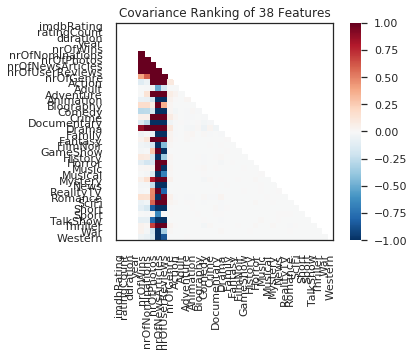

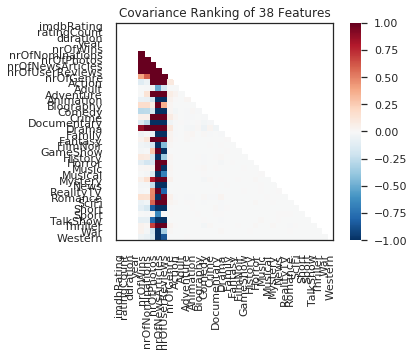

In [44]:
#help(Analyser.covariance_heatmap)
an.covariance_heatmap()

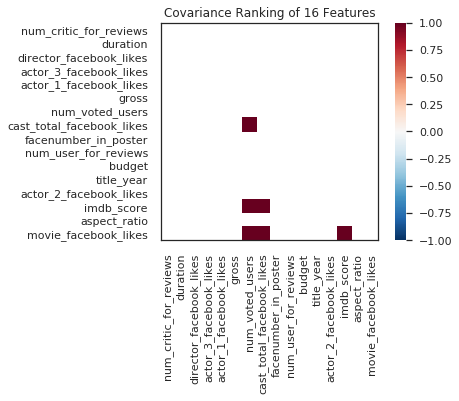

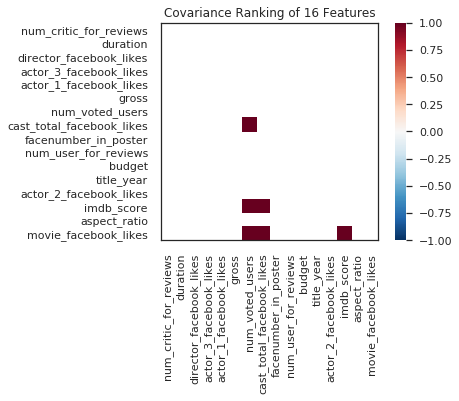

In [45]:
mn.covariance_heatmap()

In [46]:
#an.percentile_plots()

# Countries and movies
*  The US and the UK are the countries with more movies produced which makes them also have a wider range for good and bad rated films.

* Apart from these two, the following countries with higher production of films are the following: Canada, Germany and France. Even though their concentration relies more on the well rated side they still have some movies that will go under 5 points of score.

* Spain, Hong Kong, China and Australia are countries with a lower production of movies but interestingly they also have all of them over the 5 points of score according to the IMDB results.

* Apparently it seems difficult to achieve a really high rated movie because only some of the US movies will be over 9 points of score. This makes us think that audiences are not easily satisfied within the film industry.

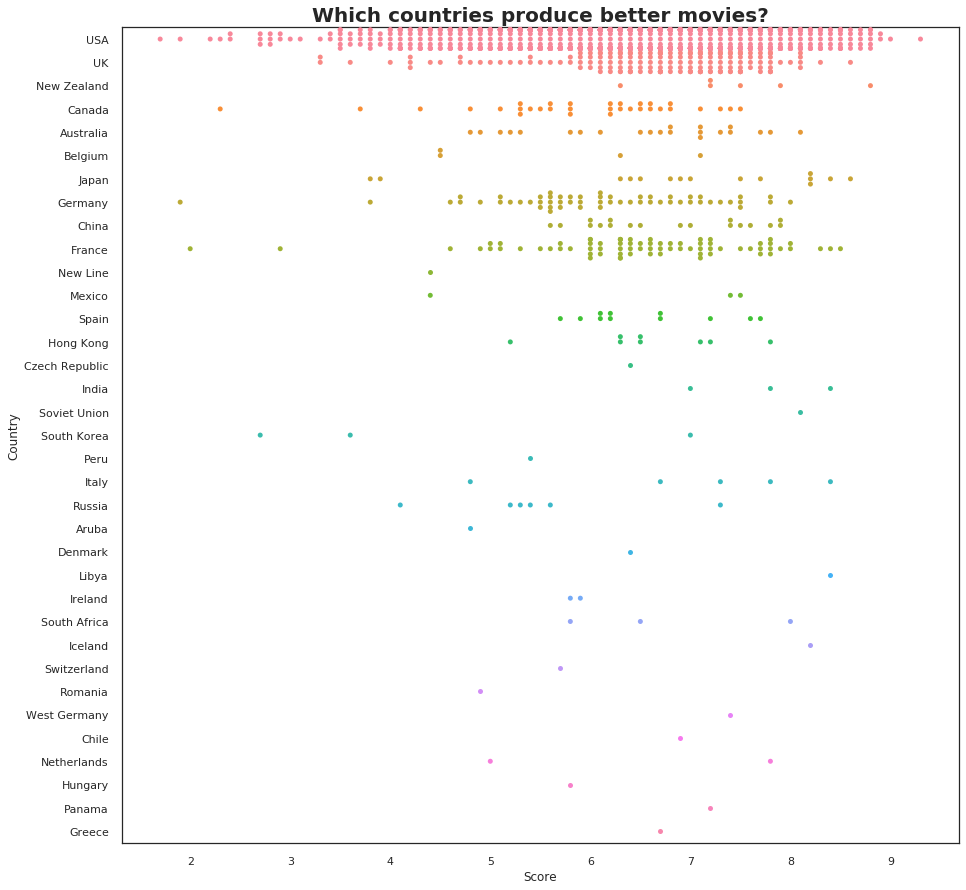

In [47]:
#Slicing the data in half for a clearer visualization
movie_sliced = df_m[0:2501]

#Building the plot
mp.figure(figsize=(15,15))
sn.swarmplot(x='imdb_score', y='country', data = movie_sliced)
mp.title ('Which countries produce better movies?', fontsize=20, fontweight='bold')
mp.xlabel('Score')
mp.ylabel('Country')
mp.show()

# Directors with highest grossing movies

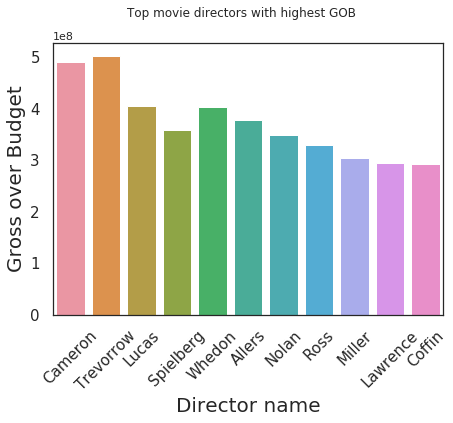

In [48]:
df=df_m
df['GOB']=df['gross']-df['budget']
top_GOB = df.sort_values('GOB',ascending=False).head(15)

top_GOB['director_familyName'] = df["director_name"].str.split(" ", n = 2, expand = True) [1]
fig,ax = plt.subplots(figsize=(7, 5))

ax = sns.barplot(x="director_familyName", y="GOB", data=top_GOB,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle('Top movie directors with highest GOB', fontsize=12)
ax.set_xlabel('Director name',fontsize=20)
ax.set_ylabel('Gross over Budget',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show();